Manuscript Graphics
---------------------------

This notebook creates publication-quality graphics for the following manuscript figures:

* `2_ADP.2018-04-11T01_01_47.531_zoom (2).png`
* `20_ADP.2014-09-26T16_52_17.823_zoom (1).png`
* `airglowexample.png`
* `eruptive_variable_star_reduced_spectrum-1.png`
* `eruptivevariablestarbroadpeak.png`
* `HARPS_2010-09-14T01_44_18_810cosmicRAY.png`
* `HARPS_2013-08-18T05_02_20_353bleed.png`
* `HD127423.png`

Matplotlib magic

In [198]:
%matplotlib widget

Set up and import

In [199]:
from astroquery.eso import Eso
eso = Eso()
from pathlib import Path
eso_cache_folder = Path(eso.cache_location)
import harpscompare
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
mpl.rcParams['axes.titlesize'] = 'medium'
mpl.rcParams['axes.labelsize'] = 'medium'
figurewidth=8
figureheight=3.75

In [200]:
if not eso.authenticated():
    eso.login(username="goodmanj", store_password=True)

INFO: Authenticating goodmanj on www.eso.org... [astroquery.eso.core]
INFO: Authentication successful! [astroquery.eso.core]


Check that files exist, download if necessary

In [201]:
benjiname = ["2_ADP.2018-04-11T01_01_47.531_zoom (2).png",
             "20_ADP.2014-09-26T16_52_17.823_zoom (1).png",
             "HARPS_2010-09-14T01_44_18_810cosmicRAY.png",
             "HARPS_2013-08-18T05_02_20_353bleed.png"
             "HD127423.png"
             "airglowexample.png"
             "eruptive_variable_star_reduced_spectrum-1.png"]

fig_label = ["seti_candidate_GJ317",
             "seti_candidate_HIP87607",
             "Cosmic_ray_example",
             "bleedthrough",
             "seti_candidate_HD127423",
             "airglowexample",
             "eruptivevariablestar"]

specfiles = ["ADP.2018-04-11T01_01_47.531.fits",
             "ADP.2014-09-26T16_52_17.823.fits",
             "ADP.2014-09-24T09_42_23.183.fits",
             "ADP.2014-10-06T10_05_51.713.fits",
             "ADP.2014-10-06T10_06_38.740.fits",
             "ADP.2014-10-06T10_04_01.373.fits",
             "ADP.2014-10-06T10_04_35.637.fits"]

rawfiles = ["" for file in specfiles]
fullrawfiles = ["" for file in specfiles]
fullspecfiles = [eso_cache_folder/file for file in specfiles]

for i in range(len(specfiles)):
    if not fullspecfiles[i].exists():
        print("Downloading "+fullspecfiles[i].stem)
        download_name =  str(fullspecfiles[i].stem).replace("_",":")
        print(download_name)
        harpscompare.download_spectrum(download_name)
    else:
        print(fullspecfiles[i])
    specfits = fits.open(fullspecfiles[i])
    rawfile = specfits[0].header['PROV1'][:-5]
    specfits.close()
    rawfiles[i] = rawfile.replace(":","_")+".fits"
    fullrawfiles[i] = eso_cache_folder/rawfiles[i]
    if not fullrawfiles[i].exists():
        print("Downloading "+fullrawfiles[i].__str__())
        print(rawfile)
        harpscompare.download_raw(rawfile)
    else:
        print(fullrawfiles[i])
        
print([file.exists() for file in fullspecfiles])
print([file.exists() for file in fullrawfiles])



C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2018-04-11T01_01_47.531.fits
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2018-04-10T03_25_08.275.fits
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-09-26T16_52_17.823.fits
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2012-10-22T23_39_09.238.fits
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-09-24T09_42_23.183.fits
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2010-09-14T01_44_18.810.fits
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-10-06T10_05_51.713.fits
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2013-08-18T05_02_20.353.fits
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-10-06T10_06_38.740.fits
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2013-06-01T04_16_19.375.fits
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.2014-10-06T10_04_01.373.fits
C:\Users\goodm\.astropy\cache\astroquery\Eso\HARPS.2013-03-31T08_25_02.332.fits
C:\Users\goodm\.astropy\cache\astroquery\Eso\ADP.201

# seti_candidate_GJ317

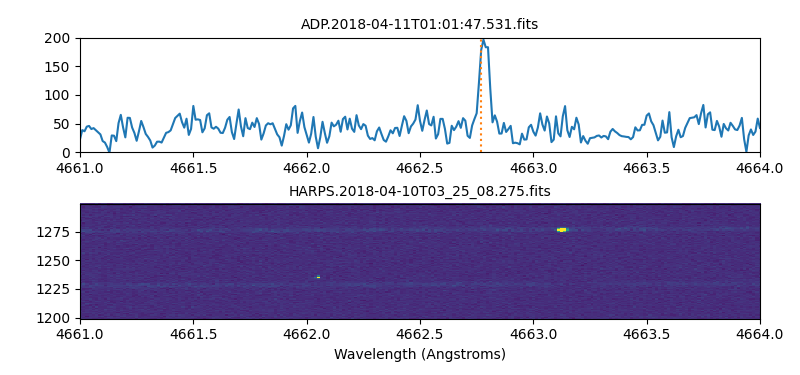

In [202]:
fig=0
plt.figure(fig)
plt.figure(fig).set_size_inches(figurewidth,figureheight)
plt.clf()

specfits = fits.open(fullspecfiles[fig])
wave = specfits[1].data[0][0] 
arr1 = specfits[1].data[0][1] 

lamb = 4662.77/10
lamb_range = [4661/10,4664/10]

harpscompare.compare_spec_to_raw(fullspecfiles[fig],rawfilename=fullrawfiles[fig],lamb=lamb,lamb_range=lamb_range,
                                 spec_countmin=0,spec_countmax=200,raw_countmin=00,raw_countmax=200)
plt.ylim(1260,1290)
plt.subplots_adjust(left = .1, right = .95, bottom = .15, top = .9, hspace=.45)

plt.savefig(Path("manuscript-figures")/(fig_label[fig]+".pdf"),format="pdf")



# seti_candidate_HIP87607

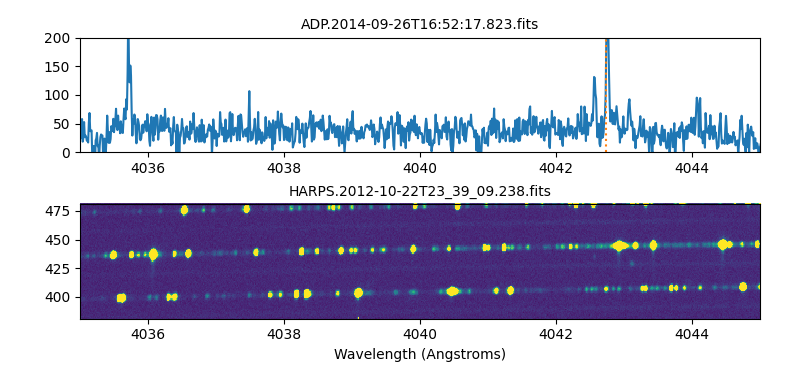

In [203]:
fig=1
plt.figure(fig)
plt.figure(fig).set_size_inches(figurewidth,figureheight)
plt.clf()

specfits = fits.open(fullspecfiles[fig])
wave = specfits[1].data[0][0] 
arr1 = specfits[1].data[0][1] 

lamb = 4042.74/10
lamb_range = [4035/10,4045/10]

harpscompare.compare_spec_to_raw(fullspecfiles[fig],rawfilename=fullrawfiles[fig],lamb=lamb,lamb_range=lamb_range,
                                 spec_countmin=0,spec_countmax=200,raw_countmin=00,raw_countmax=200)
plt.ylim(415,450)
plt.subplots_adjust(left = .1, right = .95, bottom = .15, top = .9, hspace=.45)

plt.savefig(Path("manuscript-figures")/(fig_label[fig]+".pdf"),format="pdf")


# Cosmic_ray_example

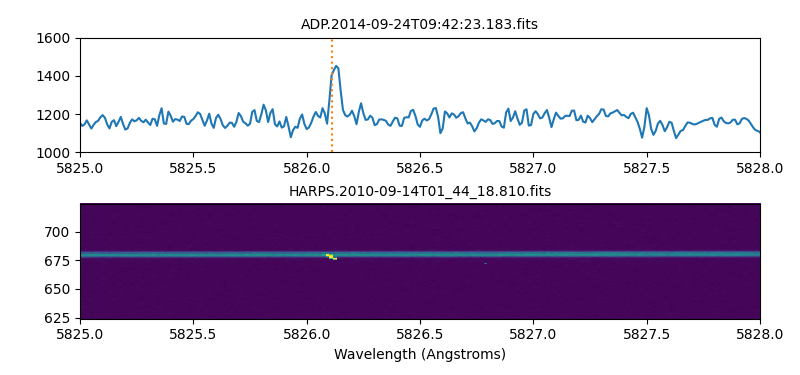

In [204]:
fig=2
plt.figure(fig)
plt.figure(fig).set_size_inches(figurewidth,figureheight)
plt.clf()

specfits = fits.open(fullspecfiles[fig])
wave = specfits[1].data[0][0] 
arr1 = specfits[1].data[0][1] 

lamb = 5826.11/10
lamb_range = [5825/10,5828/10]

harpscompare.compare_spec_to_raw(fullspecfiles[fig],rawfilename=fullrawfiles[fig],lamb=lamb,lamb_range=lamb_range,
                                 spec_countmin=1000,spec_countmax=1600,raw_countmin=00,raw_countmax=1600)
plt.ylim(660,690)
plt.subplots_adjust(left = .1, right = .95, bottom = .15, top = .9, hspace=.45)

plt.savefig(Path("manuscript-figures")/(fig_label[fig]+".pdf"),format="pdf")


# bleedthrough

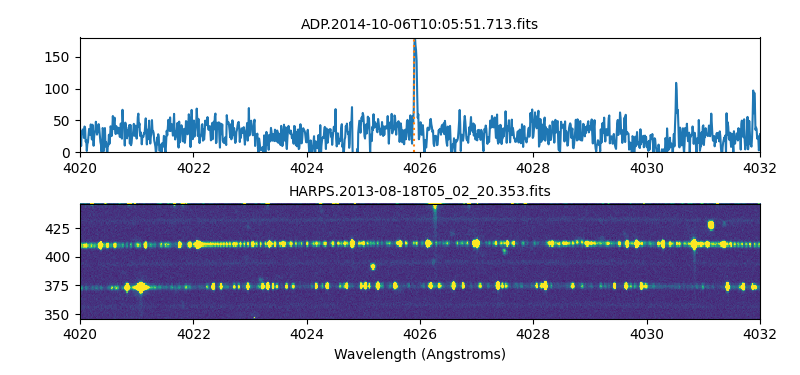

In [205]:
fig=3
plt.figure(fig)
plt.figure(fig).set_size_inches(figurewidth,figureheight)
plt.clf()

specfits = fits.open(fullspecfiles[fig])
wave = specfits[1].data[0][0] 
arr1 = specfits[1].data[0][1] 

lamb = 4025.9/10
lamb_range = [4020/10,4032/10]

harpscompare.compare_spec_to_raw(fullspecfiles[fig],rawfilename=fullrawfiles[fig],lamb=lamb,lamb_range=lamb_range,
                                 spec_countmin=0,spec_countmax=180,raw_countmin=00,raw_countmax=180)
plt.ylim(420,460)
plt.subplots_adjust(left = .1, right = .95, bottom = .15, top = .9, hspace=.45)

plt.savefig(Path("manuscript-figures")/(fig_label[fig]+".pdf"),format="pdf")


# seti_candidate_HD127423

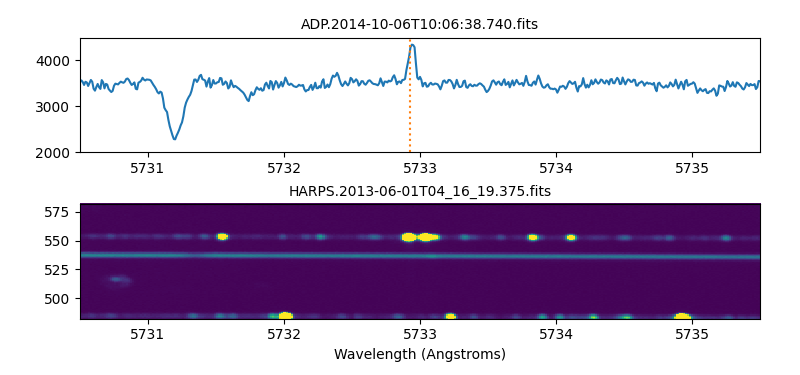

In [206]:
fig=4
plt.figure(fig)
plt.figure(fig).set_size_inches(figurewidth,figureheight)
plt.clf()

specfits = fits.open(fullspecfiles[fig])
wave = specfits[1].data[0][0] 
arr1 = specfits[1].data[0][1] 

lamb = 5732.93/10
lamb_range = [5730.5/10,5735.5/10]

harpscompare.compare_spec_to_raw(fullspecfiles[fig],rawfilename=fullrawfiles[fig],lamb=lamb,lamb_range=lamb_range,
                                 spec_countmin=2000,spec_countmax=4500,raw_countmin=0,raw_countmax=2000)
plt.ylim(526,542)
plt.subplots_adjust(left = .1, right = .95, bottom = .15, top = .9, hspace=.45)

plt.savefig(Path("manuscript-figures")/(fig_label[fig]+".pdf"),format="pdf")


# airglowexample

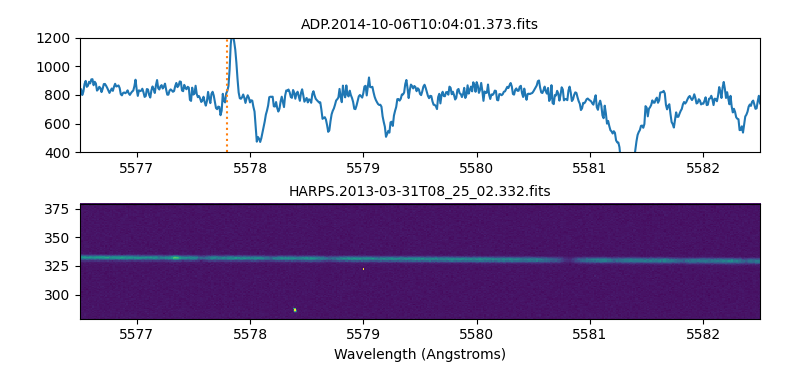

In [207]:
fig=5
plt.figure(fig)
plt.figure(fig).set_size_inches(figurewidth,figureheight)
plt.clf()

specfits = fits.open(fullspecfiles[fig])
wave = specfits[1].data[0][0] 
arr1 = specfits[1].data[0][1] 

lamb = 5577.8/10
lamb_range = [5576.5/10,5582.5/10]

harpscompare.compare_spec_to_raw(fullspecfiles[fig],rawfilename=fullrawfiles[fig],lamb=lamb,lamb_range=lamb_range,
                                 spec_countmin=400,spec_countmax=1200,raw_countmin=0,raw_countmax=400)
plt.ylim(315,340)
plt.subplots_adjust(left = .1, right = .95, bottom = .15, top = .9, hspace=.45)

plt.savefig(Path("manuscript-figures")/(fig_label[fig]+".pdf"),format="pdf")


# eruptivevariablestar

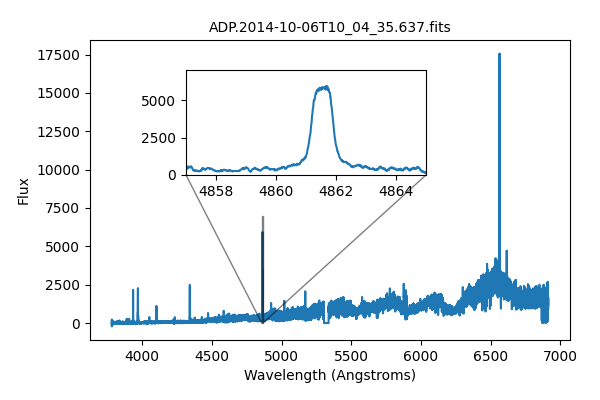

In [216]:
fig=6
plt.figure(fig)
plt.clf()

specfits = fits.open(fullspecfiles[fig])
wave = specfits[1].data[0][0] 
arr1 = specfits[1].data[0][1] 

figvar,ax = plt.subplots()
plt.plot(wave,arr1)
plt.xlabel("Wavelength (Angstroms)")
plt.ylabel("Flux")
plt.title(specfiles[fig])
axins = ax.inset_axes(bounds=[.2,.55,.5,.35],xlim=(4857,4865),ylim=(0,7000))
axins.plot(wave,arr1)
ax.indicate_inset_zoom(axins, edgecolor="black")
plt.subplots_adjust(left = .15, right = .95, bottom = .15, top = .9, hspace=.45)
plt.figure(figvar).set_size_inches(6,4)
plt.show()

plt.savefig(Path("manuscript-figures")/(fig_label[fig]+".pdf"),format="pdf")
